# ECE570 Project: Accurate Prediction of Bounding Boxes in Object Detection
## Name: Souradip Pal
## PUID: 0034772329

This notebook contains steps to run an available implementation of the paper "Bounding Box Regression with Uncertainty for Accurate Object Detection" by He et. al. from the repository ["KL-Loss-pytorch"](https://github.com/cxliu0/KL-Loss-pytorch.git).

## Intialize Runtime
Set runtime as CPU

In [5]:
import torch
if not torch.cuda.is_available():
  print('Good to go!')
else:
  print('Please set CPU via Edit -> Notebook Settings.')

Good to go!


## Mount Drive to Load Project

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
%cd /content/drive/MyDrive/ECE570/project # path to project directory

/content/drive/MyDrive/ECE570/project


## Install Dependencies

In [15]:
!git clone https://github.com/cxliu0/KL-Loss-pytorch.git
%cd KL-Loss-pytorch

/content/drive/MyDrive/ECE570/project/KL-Loss-pytorch


In [8]:
# install dependecies
!pip install -r requirements/build.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# install mmcv (will take a while to process)
%cd mmcv
!MMCV_WITH_OPS=1 pip install -e .

/content/drive/MyDrive/ECE570/project/KL-Loss-pytorch/mmcv
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/ECE570/project/KL-Loss-pytorch/mmcv
     |████████████████████████████████| 190 kB 7.4 MB/s 
  Running setup.py develop for mmcv-full


In [10]:
# install OA-MIL
%cd ..
!pip install -e .

/content/drive/MyDrive/ECE570/project/KL-Loss-pytorch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/drive/MyDrive/ECE570/project/KL-Loss-pytorch
  Created wheel for mmpycocotools: filename=mmpycocotools-12.0.3-cp37-cp37m-linux_x86_64.whl size=265555 sha256=e116e86d7d779af4476d11822fcc571b20a54d9148a1b996a005ef545d0d2a56
  Stored in directory: /root/.cache/pip/wheels/cc/fa/4a/067979eccddf6a22b46722493df8e07b0541956a5ab5bac8b1
Successfully built mmpycocotools
  Running setup.py develop for mmdet


In [11]:
!CUDA_VISIBLE_DEVICES=0

In [ ]:
!git clone https://github.com/chongruo/tiny-coco.git

Cloning into 'tiny-coco'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 0), reused 6 (delta 0), pack-reused 23
Unpacking objects: 100% (29/29), done.


In [ ]:
!mkdir data
!mkdir data/coco
!mkdir data/coco/annotations
!mkdir data/coco/val2017
!cp tiny-coco/small_coco/instances_train2017_small.json data/coco/annotations/instances_val2017.json
!cp -r tiny-coco/small_coco/train_2017_small/* data/coco/val2017

In [16]:
!rm -rf pretrained_model
!mkdir pretrained_model

## Download Faster RCNN Resnet-50-FPN pretrained model without KL Loss 

In [17]:
!wget https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth -P ./pretrained_model/

--2022-11-20 07:16:54--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.86
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

faster_rcnn_r50_fpn 100%[===================>] 159.54M  12.8MB/s    in 12s     

2022-11-20 07:17:07 (13.2 MB/s) - ‘./pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



## Download pretrained model with KL Loss 
Downlaod the pretrained model from this [link](https://drive.google.com/file/d/1KZxF8n6SXhoZHX-EyHpP8LID1EtFDrWu/view?usp=sharing). Given below is the command to download using gdrive file id.

In [29]:
!gdown 1KZxF8n6SXhoZHX-EyHpP8LID1EtFDrWu -O ./pretrained_model/kl_model.pth

Downloading...
From: https://drive.google.com/uc?id=1KZxF8n6SXhoZHX-EyHpP8LID1EtFDrWu
To: /content/drive/MyDrive/ECE570/project/KL-Loss-pytorch/pretrained_model/kl_model.pth
100% 169M/169M [00:01<00:00, 142MB/s]


In [19]:
!rm -rf outputs
!mkdir outputs
!mkdir outputs/baseline

## Inference with Original Model (Faster RCNN Resnet-50-FPN)

In [20]:
!python tools/test.py \
    ./configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py \
    ./pretrained_model/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
     --eval 'bbox' --show-dir ./outputs/baseline

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
loading annotations into memory...
Done (t=0.91s)
creating index...
index created!
[>>] 16/16, 0.1 task/s, elapsed: 136s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.19s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.317
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.587
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.305
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.263
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.373
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.360
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.387
Average Recall   

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['figure.figsize'] = (8.0, 8.0)

def plot_img(path):
  img = mpimg.imread(path)
  plt.imshow(img)

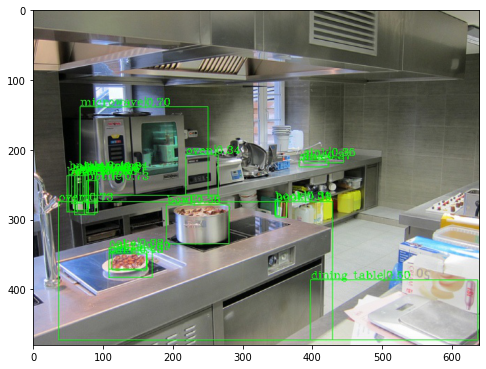

In [26]:
plot_img('./outputs/baseline/000000309022.jpg')

In [27]:
!mkdir outputs/with_kl

### With KL Loss
Modify ./configs/\_base\_/models/faster_rcnn_r50_fpn_coco_kl.py
1. set softnms=False 
2. set var_vote=False

In [30]:
!python tools/test.py \
    ./configs/faster_rcnn/faster_rcnn_r50_fpn_2x_coco_kl.py \
    ./pretrained_model/kl_model.pth \
     --eval 'bbox' --show-dir ./outputs/with_kl

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
[>>] 16/16, 0.1 task/s, elapsed: 157s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.22s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.490
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.702
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.558
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.410
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.642
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.557
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.579
Average Recall   

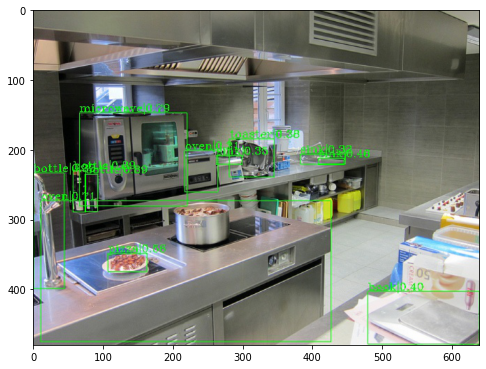

In [31]:
plot_img('./outputs/with_kl/000000309022.jpg')

### With KL Loss + Var-Voting
Modify ./configs/\_base\_/models/faster_rcnn_r50_fpn_coco_kl.py
1. set softnms=False 
2. set var_vote=True

In [34]:
!mkdir outputs/with_kl_varvote
!python tools/test.py \
    ./configs/faster_rcnn/faster_rcnn_r50_fpn_2x_coco_kl.py \
    ./pretrained_model/kl_model.pth \
     --eval 'bbox' --show-dir ./outputs/with_kl_varvote

mkdir: cannot create directory ‘outputs/with_kl_varvote’: File exists
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
[>>] 16/16, 0.1 task/s, elapsed: 133s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.20s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.477
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.700
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.525
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.427
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.637
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.527
Average Recall     (AR) @[

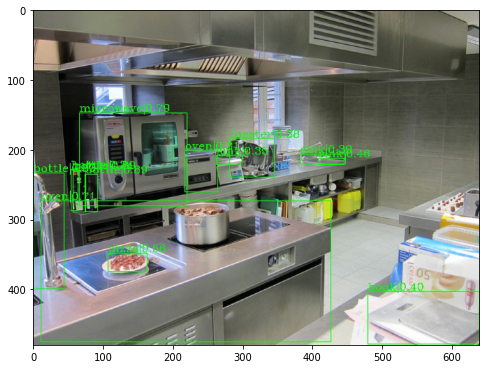

In [35]:
plot_img('./outputs/with_kl_varvote/000000309022.jpg')

### With KL Loss + Var-Voting + Soft-NMS
Modify ./configs/\_base\_/models/faster_rcnn_r50_fpn_coco_kl.py
1. set softnms=True 
2. set var_vote=True

In [36]:
!mkdir outputs/with_kl_varvote_softnms
!python tools/test.py \
    ./configs/faster_rcnn/faster_rcnn_r50_fpn_2x_coco_kl.py \
    ./pretrained_model/kl_model.pth \
     --eval 'bbox' --show-dir ./outputs/with_kl_varvote_softnms

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
loading annotations into memory...
Done (t=0.15s)
creating index...
index created!
[>>] 16/16, 0.1 task/s, elapsed: 147s, ETA:     0s
Evaluating bbox...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.64s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.490
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.702
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.558
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.410
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.642
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.557
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.579
Average Recall   

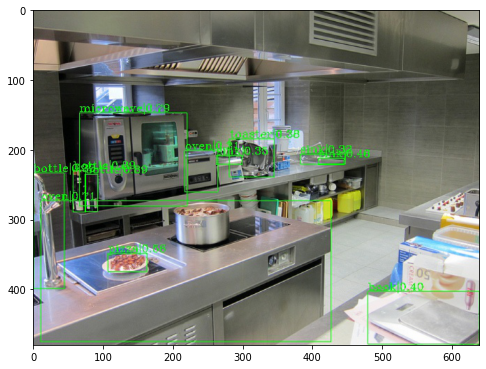

In [37]:
plot_img('./outputs/with_kl_varvote_softnms/000000309022.jpg')